In [108]:
import numpy as np
import pandas as pd

## Load Data 

In [109]:
df_human = pd.read_excel("datasetjurnal.xlsx")
df_human.head()

,Jurnal_Manusia,Jurnal_AI
0,Pendidikan sangat berpengaruh terhadap kemajua...,Diabetes melitus merupakan salah satu penyakit...
1,Kanker payudara merupakan jenis kanker yang be...,Perkembangan teknologi digital telah mengubah ...
2,Pada era sekarang perkembangan teknologi khusu...,"Dalam sistem pendidikan tinggi, keberhasilan m..."
3,"Menurut Organisasi Kesehatan Dunia, kanker ada...",Loyalitas pelanggan merupakan aset penting dal...
4,Perkembangan teknologi saat ini terjadi sangat...,Email masih menjadi sarana komunikasi utama da...


## Pelabelan Data

In [110]:
import pandas as pd

# Load data awal
df = pd.read_excel("datasetjurnal.xlsx")

# Panjang data
n = len(df)

# Siapkan list kosong
text = []
label = []

# Gabung berselang: Jurnal_Manusia, Jurnal_AI, dst
for i in range(n):
    text.append(df.loc[i, 'Jurnal_Manusia'])
    label.append(1)
    text.append(df.loc[i, 'Jurnal_AI'])
    label.append(0)

# Buat DataFrame hasil gabungan
    df_interleaved = pd.DataFrame({
    'text': text,
    'label': label
})

# Simpan ke file
df_interleaved.to_excel("datasetjurnal_label.xlsx", index=False)

In [111]:
df_interleaved.head()

,text,label
0,Pendidikan sangat berpengaruh terhadap kemajua...,1
1,Diabetes melitus merupakan salah satu penyakit...,0
2,Kanker payudara merupakan jenis kanker yang be...,1
3,Perkembangan teknologi digital telah mengubah ...,0
4,Pada era sekarang perkembangan teknologi khusu...,1


### Menghitung Jumlah Jurnal Manusia dan AI

In [112]:
# === Hitung jumlah jurnal per label ===
label_counts = df_interleaved['label'].value_counts()

print("Jumlah jurnal AI     :", label_counts.get(0, 0))
print("Jumlah jurnal Manusia:", label_counts.get(1, 0))

Jumlah jurnal AI     : 310
Jumlah jurnal Manusia: 310


### Menghitung Jumlah Baris dan Kolom Dataset

In [113]:
# === Menghitung Jumlah Baris dan Kolom Dataset ===
print("Ukuran dataset (baris, kolom):", df.shape)

Ukuran dataset (baris, kolom): (310, 2)


## Preprocessing

In [114]:
# Load dataset setelah diberi label
df = pd.read_excel("datasetjurnal_label.xlsx")

# Tampilkan beberapa baris awal untuk verifikasi
df.head()

,text,label
0,Pendidikan sangat berpengaruh terhadap kemajua...,1
1,Diabetes melitus merupakan salah satu penyakit...,0
2,Kanker payudara merupakan jenis kanker yang be...,1
3,Perkembangan teknologi digital telah mengubah ...,0
4,Pada era sekarang perkembangan teknologi khusu...,1


In [115]:
# Missing Value
df.isnull().sum()

text     0
label    0
dtype: int64

In [116]:
## Periksa Data Duplikat
df.duplicated().sum()
print(f"Jumlah Data yang Terduplikat :{df.duplicated().sum()}")

Jumlah Data yang Terduplikat :8


In [117]:
# Menghapus Data Duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Menghapus Karakter

In [140]:
# Menghapus karakter selain huruf dan spasi (termasuk angka, tanda baca, simbol, newline)
import re

df['cleaned'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', str(x)))
print("\n[1] Hasil Cleaning - hanya huruf dan spasi:")
df.head()


[1] Hasil Cleaning - hanya huruf dan spasi:


,text,label,cleaned
0,Pendidikan sangat berpengaruh terhadap kemajua...,1,Pendidikan sangat berpengaruh terhadap kemajua...
1,Diabetes melitus merupakan salah satu penyakit...,0,Diabetes melitus merupakan salah satu penyakit...
2,Kanker payudara merupakan jenis kanker yang be...,1,Kanker payudara merupakan jenis kanker yang be...
3,Perkembangan teknologi digital telah mengubah ...,0,Perkembangan teknologi digital telah mengubah ...
4,Pada era sekarang perkembangan teknologi khusu...,1,Pada era sekarang perkembangan teknologi khusu...


### Case Folding

In [141]:
# Mengubah semua huruf menjadi huruf kecil (lowercase)
df['case_folding'] = df['cleaned'].str.lower()
print("\n[2] Hasil Case Folding - huruf kecil semua:")
df.head()


[2] Hasil Case Folding - huruf kecil semua:


,text,label,cleaned,case_folding
0,Pendidikan sangat berpengaruh terhadap kemajua...,1,Pendidikan sangat berpengaruh terhadap kemajua...,pendidikan sangat berpengaruh terhadap kemajua...
1,Diabetes melitus merupakan salah satu penyakit...,0,Diabetes melitus merupakan salah satu penyakit...,diabetes melitus merupakan salah satu penyakit...
2,Kanker payudara merupakan jenis kanker yang be...,1,Kanker payudara merupakan jenis kanker yang be...,kanker payudara merupakan jenis kanker yang be...
3,Perkembangan teknologi digital telah mengubah ...,0,Perkembangan teknologi digital telah mengubah ...,perkembangan teknologi digital telah mengubah ...
4,Pada era sekarang perkembangan teknologi khusu...,1,Pada era sekarang perkembangan teknologi khusu...,pada era sekarang perkembangan teknologi khusu...


### Tokenizing

In [142]:
# Memecah kalimat menjadi list kata berdasarkan spasi
df['tokenized'] = df['case_folding'].apply(lambda x: x.split())
print("\n[3] Hasil Tokenizing - dipisah jadi list kata:")
df.head()


[3] Hasil Tokenizing - dipisah jadi list kata:


,text,label,cleaned,case_folding,tokenized
0,Pendidikan sangat berpengaruh terhadap kemajua...,1,Pendidikan sangat berpengaruh terhadap kemajua...,pendidikan sangat berpengaruh terhadap kemajua...,"[pendidikan, sangat, berpengaruh, terhadap, ke..."
1,Diabetes melitus merupakan salah satu penyakit...,0,Diabetes melitus merupakan salah satu penyakit...,diabetes melitus merupakan salah satu penyakit...,"[diabetes, melitus, merupakan, salah, satu, pe..."
2,Kanker payudara merupakan jenis kanker yang be...,1,Kanker payudara merupakan jenis kanker yang be...,kanker payudara merupakan jenis kanker yang be...,"[kanker, payudara, merupakan, jenis, kanker, y..."
3,Perkembangan teknologi digital telah mengubah ...,0,Perkembangan teknologi digital telah mengubah ...,perkembangan teknologi digital telah mengubah ...,"[perkembangan, teknologi, digital, telah, meng..."
4,Pada era sekarang perkembangan teknologi khusu...,1,Pada era sekarang perkembangan teknologi khusu...,pada era sekarang perkembangan teknologi khusu...,"[pada, era, sekarang, perkembangan, teknologi,..."


### Normalisasi

In [143]:
# Mengganti kata tidak baku dengan kata baku menggunakan kamus sederhana
normal_dict = {'tdk': 'tidak', 'dr': 'dari', 'dgn': 'dengan', 'yg': 'yang', 'tp': 'tapi'}
df['normalized'] = df['tokenized'].apply(lambda tokens: [normal_dict.get(t, t) for t in tokens])
print("\n[4] Hasil Normalisasi - kata tidak baku jadi baku:")
df.head()


[4] Hasil Normalisasi - kata tidak baku jadi baku:


,text,label,cleaned,case_folding,tokenized,normalized
0,Pendidikan sangat berpengaruh terhadap kemajua...,1,Pendidikan sangat berpengaruh terhadap kemajua...,pendidikan sangat berpengaruh terhadap kemajua...,"[pendidikan, sangat, berpengaruh, terhadap, ke...","[pendidikan, sangat, berpengaruh, terhadap, ke..."
1,Diabetes melitus merupakan salah satu penyakit...,0,Diabetes melitus merupakan salah satu penyakit...,diabetes melitus merupakan salah satu penyakit...,"[diabetes, melitus, merupakan, salah, satu, pe...","[diabetes, melitus, merupakan, salah, satu, pe..."
2,Kanker payudara merupakan jenis kanker yang be...,1,Kanker payudara merupakan jenis kanker yang be...,kanker payudara merupakan jenis kanker yang be...,"[kanker, payudara, merupakan, jenis, kanker, y...","[kanker, payudara, merupakan, jenis, kanker, y..."
3,Perkembangan teknologi digital telah mengubah ...,0,Perkembangan teknologi digital telah mengubah ...,perkembangan teknologi digital telah mengubah ...,"[perkembangan, teknologi, digital, telah, meng...","[perkembangan, teknologi, digital, telah, meng..."
4,Pada era sekarang perkembangan teknologi khusu...,1,Pada era sekarang perkembangan teknologi khusu...,pada era sekarang perkembangan teknologi khusu...,"[pada, era, sekarang, perkembangan, teknologi,...","[pada, era, sekarang, perkembangan, teknologi,..."


### Stemming

In [144]:
# Mengubah kata ke bentuk dasarnya menggunakan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
df['stemmed'] = df['normalized'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])
print("\n[5] Hasil Stemming - kata ke bentuk dasar:")
df.head()


[5] Hasil Stemming - kata ke bentuk dasar:


,text,label,cleaned,case_folding,tokenized,normalized,stemmed
0,Pendidikan sangat berpengaruh terhadap kemajua...,1,Pendidikan sangat berpengaruh terhadap kemajua...,pendidikan sangat berpengaruh terhadap kemajua...,"[pendidikan, sangat, berpengaruh, terhadap, ke...","[pendidikan, sangat, berpengaruh, terhadap, ke...","[didik, sangat, pengaruh, hadap, maju, buah, n..."
1,Diabetes melitus merupakan salah satu penyakit...,0,Diabetes melitus merupakan salah satu penyakit...,diabetes melitus merupakan salah satu penyakit...,"[diabetes, melitus, merupakan, salah, satu, pe...","[diabetes, melitus, merupakan, salah, satu, pe...","[diabetes, melitus, rupa, salah, satu, sakit, ..."
2,Kanker payudara merupakan jenis kanker yang be...,1,Kanker payudara merupakan jenis kanker yang be...,kanker payudara merupakan jenis kanker yang be...,"[kanker, payudara, merupakan, jenis, kanker, y...","[kanker, payudara, merupakan, jenis, kanker, y...","[kanker, payudara, rupa, jenis, kanker, yang, ..."
3,Perkembangan teknologi digital telah mengubah ...,0,Perkembangan teknologi digital telah mengubah ...,perkembangan teknologi digital telah mengubah ...,"[perkembangan, teknologi, digital, telah, meng...","[perkembangan, teknologi, digital, telah, meng...","[kembang, teknologi, digital, telah, ubah, car..."
4,Pada era sekarang perkembangan teknologi khusu...,1,Pada era sekarang perkembangan teknologi khusu...,pada era sekarang perkembangan teknologi khusu...,"[pada, era, sekarang, perkembangan, teknologi,...","[pada, era, sekarang, perkembangan, teknologi,...","[pada, era, sekarang, kembang, teknologi, khus..."


### Stopword Removal

In [145]:
# Daftar stopword manual Bahasa Indonesia
stopwords_id = set([
    'ada', 'adanya', 'adalah', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah',
    'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'diantaranya',
    'antara', 'antaranya', 'diantara', 'apa', 'apaan', 'mengapa', 'apabila', 'apakah', 'apalagi',
    'apatah', 'atau', 'ataukah', 'ataupun', 'bagai', 'bagaikan', 'sebagai', 'sebagainya', 'bagaimana',
    'bagaimanapun', 'sebagaimana', 'bagaimanakah', 'bagi', 'bahkan', 'bahwa', 'bahwasanya', 'sebaliknya',
    'banyak', 'sebanyak', 'beberapa', 'seberapa', 'begini', 'beginian', 'beginikah', 'beginilah',
    'sebegini', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'sebegitu', 'belum', 'belumlah',
    'sebelum', 'sebelumnya', 'sebenarnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'betulkah',
    'sebetulnya', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'sebisanya', 'boleh',
    'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'cuma', 'percuma',
    'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'dekat', 'demi', 'demikian', 'demikianlah',
    'sedemikian', 'dengan', 'depan', 'di', 'dia', 'dialah', 'dini', 'diri', 'dirinya', 'terdiri',
    'dong', 'dulu', 'enggak', 'enggaknya', 'entah', 'entahlah', 'terhadap', 'terhadapnya', 'hal',
    'hampir', 'hanya', 'hanyalah', 'harus', 'haruslah', 'harusnya', 'seharusnya', 'hendak', 'hendaklah',
    'hendaknya', 'hingga', 'sehingga', 'ialah', 'ibarat', 'ingin', 'inginkah', 'inginkan', 'ini',
    'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jangan', 'jangankan', 'janganlah', 'jika',
    'jikalau', 'juga', 'justru', 'kala', 'kalua', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah',
    'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'dikarenakan', 'karena', 'karenanya',
    'ke', 'kecil', 'kemudian', 'kenapa', 'kepada', 'kepadanya', 'ketika', 'seketika', 'khususnya',
    'kini', 'kinilah', 'kiranya', 'sekiranya', 'kita', 'kitalah', 'kok', 'lagi', 'lagian', 'selagi',
    'lah', 'lain', 'lainnya', 'melainkan', 'selaku', 'lalu', 'melalui', 'terlalu', 'lama', 'lamanya',
    'selama', 'selamanya', 'lebih', 'terlebih', 'bermacam', 'macam', 'semacam', 'maka', 'makanya',
    'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masih', 'rupa',
    'masihkah', 'semasih', 'masing', 'mau', 'maupun', 'semaunya', 'memang', 'mereka', 'merekalah',
    'meski', 'meskipun', 'semula', 'mungkin', 'mungkinkah', 'nah', 'namun', 'nanti', 'nantinya',
    'nyaris', 'oleh', 'olehnya', 'seorang', 'seseorang', 'pada', 'padanya', 'padahal', 'paling',
    'sepanjang', 'pantas', 'sepantasnya', 'sepantasnyalah', 'para', 'pasti', 'pastilah', 'pernah',
    'pula', 'rupanya', 'serupa', 'saat', 'saatnya', 'sesaat', 'saja', 'sajalah', 'saling', 'salah',
    'bersama', 'sama', 'sesama', 'sambil', 'sampai', 'sana', 'sangat', 'sangatlah', 'saya', 'rupa',
    'sayalah', 'sebab', 'sebabnya', 'sebuah', 'tersebut', 'tersebutlah', 'sedang', 'sedangkan',
    'sedikit', 'sedikitnya', 'segala', 'segalanya', 'segera', 'sesegera', 'sejak', 'sejenak', 'sekali',
    'sekalian', 'sekalipun', 'sesekali', 'sekaligus', 'sekarang', 'sekitar', 'sekitarnya', 'selain',
    'selalu', 'seluruh', 'seluruhnya', 'semakin', 'sementara', 'sempat', 'semua', 'semuanya',
    'sendiri', 'sendirinya', 'seolah', 'seperti', 'sepertinya', 'sering', 'seringnya', 'serta',
    'siapa', 'siapakah', 'siapapun', 'disini', 'disinilah', 'sini', 'sinilah', 'sesuatu', 'sesuatunya',
    'suatu', 'sesudah', 'sesudahnya', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya',
    'tak', 'tanpa', 'setelah', 'telah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tertentu',
    'seterusnya', 'tapi', 'tetapi', 'setiap', 'tiap', 'setidaknya', 'tidak', 'tidakkah', 'tidaklah',
    'toh', 'waduh', 'wah', 'wahai', 'sewaktu', 'walau', 'walaupun', 'wong', 'yaitu', 'yakni', 'yang'
])

# Fungsi untuk menghapus stopword dari daftar token
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords_id]

# Terapkan ke kolom 'stemmed' dan simpan hasilnya di kolom 'no_stopwords'
df['no_stopwords'] = df['stemmed'].apply(remove_stopwords)

# Tampilkan 5 baris pertama
df.head()


,text,label,cleaned,case_folding,tokenized,normalized,stemmed,no_stopwords
0,Pendidikan sangat berpengaruh terhadap kemajua...,1,Pendidikan sangat berpengaruh terhadap kemajua...,pendidikan sangat berpengaruh terhadap kemajua...,"[pendidikan, sangat, berpengaruh, terhadap, ke...","[pendidikan, sangat, berpengaruh, terhadap, ke...","[didik, sangat, pengaruh, hadap, maju, buah, n...","[didik, pengaruh, hadap, maju, buah, negara, h..."
1,Diabetes melitus merupakan salah satu penyakit...,0,Diabetes melitus merupakan salah satu penyakit...,diabetes melitus merupakan salah satu penyakit...,"[diabetes, melitus, merupakan, salah, satu, pe...","[diabetes, melitus, merupakan, salah, satu, pe...","[diabetes, melitus, rupa, salah, satu, sakit, ...","[diabetes, melitus, satu, sakit, kronis, derit..."
2,Kanker payudara merupakan jenis kanker yang be...,1,Kanker payudara merupakan jenis kanker yang be...,kanker payudara merupakan jenis kanker yang be...,"[kanker, payudara, merupakan, jenis, kanker, y...","[kanker, payudara, merupakan, jenis, kanker, y...","[kanker, payudara, rupa, jenis, kanker, yang, ...","[kanker, payudara, jenis, kanker, asal, jaring..."
3,Perkembangan teknologi digital telah mengubah ...,0,Perkembangan teknologi digital telah mengubah ...,perkembangan teknologi digital telah mengubah ...,"[perkembangan, teknologi, digital, telah, meng...","[perkembangan, teknologi, digital, telah, meng...","[kembang, teknologi, digital, telah, ubah, car...","[kembang, teknologi, digital, ubah, cara, kons..."
4,Pada era sekarang perkembangan teknologi khusu...,1,Pada era sekarang perkembangan teknologi khusu...,pada era sekarang perkembangan teknologi khusu...,"[pada, era, sekarang, perkembangan, teknologi,...","[pada, era, sekarang, perkembangan, teknologi,...","[pada, era, sekarang, kembang, teknologi, khus...","[era, kembang, teknologi, khusus, informasi, o..."


### Gabungkan Hasil Preprocessing dan Simpan Ke CSV

In [124]:
# === Gabungkan token jadi satu kalimat akhir ===
df['final_clean_text'] = df['no_stopwords'].apply(lambda tokens: ' '.join(tokens))

# === Tampilkan hasil akhir: teks bersih + label ===
print("Hasil akhir setelah preprocessing (final_clean_text + label):")
print(df[['final_clean_text', 'label']].head())

# === Simpan hasil ke CSV ===
df[['final_clean_text', 'label']].to_csv("final_clean_dataset.csv", index=False)
print("✅ File berhasil disimpan sebagai 'final_clean_dataset.csv'")

Hasil akhir setelah preprocessing (final_clean_text + label):
                                    final_clean_text  label
0  didik pengaruh hadap maju buah negara hasil su...      1
1  diabetes melitus rupa salah satu sakit kronis ...      0
2  kanker payudara rupa jenis kanker asal jaring ...      1
3  kembang teknologi digital ubah cara konsumen i...      0
4  era kembang teknologi khusus informasi olah da...      1
✅ File berhasil disimpan sebagai 'final_clean_dataset.csv'


## Pemeriksaan Lanjutan Terhadap Data Yang Telah Diproses

### Menghitung Total Data Yang Sudah Dilabeli

In [125]:
import pandas as pd

df = pd.read_excel("datasetjurnal_label.xlsx")

# Cek jumlah data
print("Jumlah total data:", len(df))

Jumlah total data: 620


### Cek Distribusi Panjang Teks

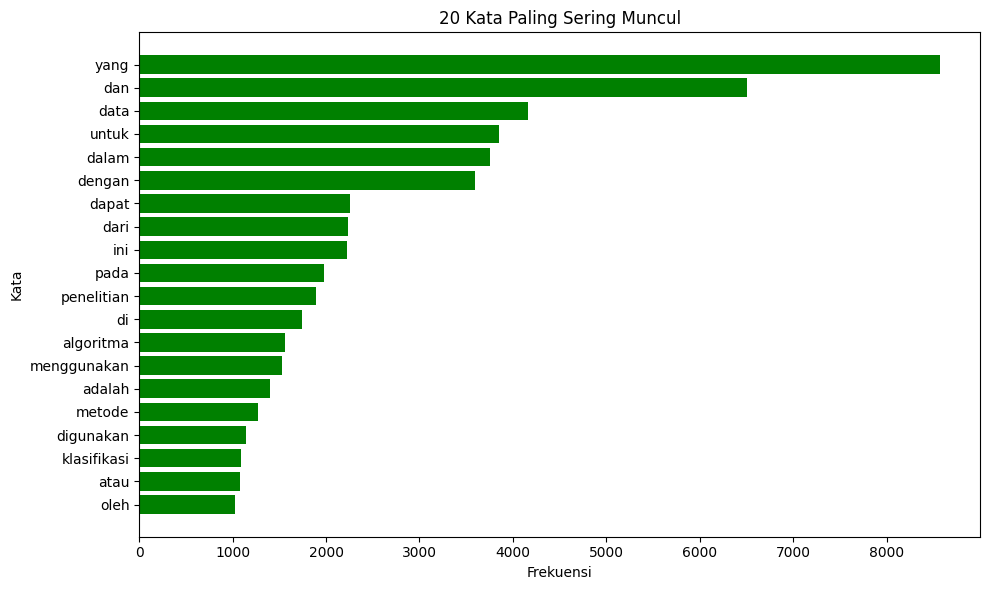

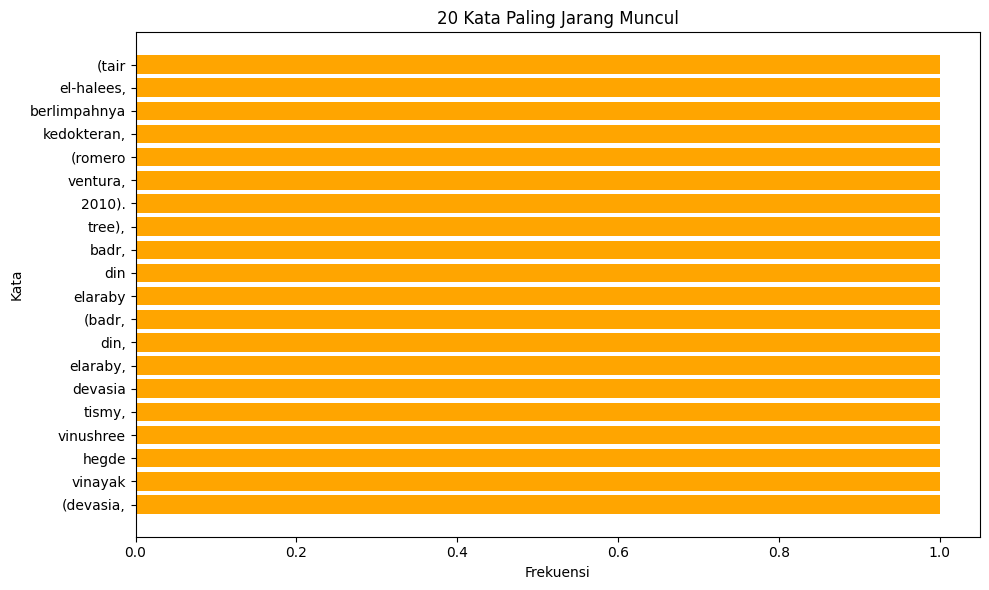

In [126]:
import matplotlib.pyplot as plt
from collections import Counter

# === Gabungkan semua teks ===
all_words = ' '.join(df['text'].astype(str)).lower().split()

# === Hitung frekuensi kata ===
frekuensi_kata = Counter(all_words)

# === Ambil 20 kata paling sering muncul ===
kata_terbanyak = frekuensi_kata.most_common(20)
kata_terbanyak_kata = [kata for kata, _ in kata_terbanyak]
kata_terbanyak_freq = [freq for _, freq in kata_terbanyak]

# === Ambil 20 kata paling jarang muncul ===
kata_terjarang = sorted(frekuensi_kata.items(), key=lambda item: item[1])[:20]
kata_terjarang_kata = [kata for kata, _ in kata_terjarang]
kata_terjarang_freq = [freq for _, freq in kata_terjarang]

# === Visualisasi kata paling sering ===
plt.figure(figsize=(10, 6))
plt.barh(kata_terbanyak_kata[::-1], kata_terbanyak_freq[::-1], color='green')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

# === Visualisasi kata paling jarang ===
plt.figure(figsize=(10, 6))
plt.barh(kata_terjarang_kata[::-1], kata_terjarang_freq[::-1], color='orange')
plt.title('20 Kata Paling Jarang Muncul')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

### Cek Distribusi Label

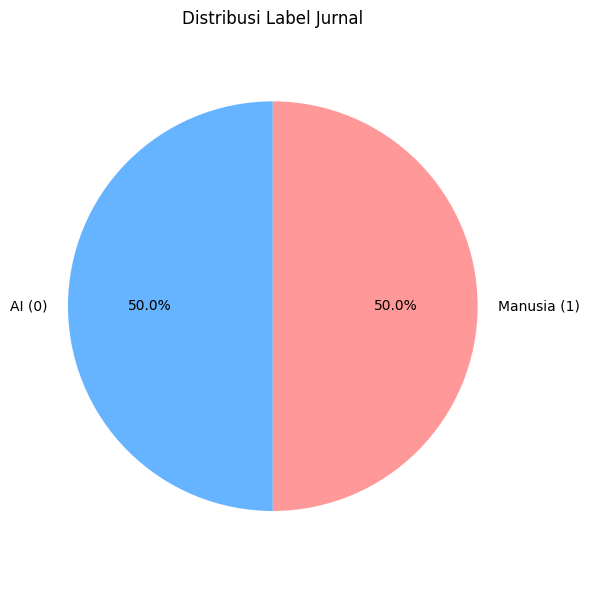

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("datasetjurnal_label.xlsx")

# Hitung distribusi label
label_counts = df['label'].value_counts()
labels = ['AI (0)', 'Manusia (1)']  # 0 = AI, 1 = Manusia
sizes = [label_counts[0], label_counts[1]]
colors = ['#66b3ff', '#ff9999']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribusi Label Jurnal')
plt.axis('equal')  # Biar pie-nya bulat
plt.tight_layout()
plt.show()

## Wordcloud AI, Manusia dan Wordcloud Gabungan Kedua Data

### Wordcloud Jurnal_AI

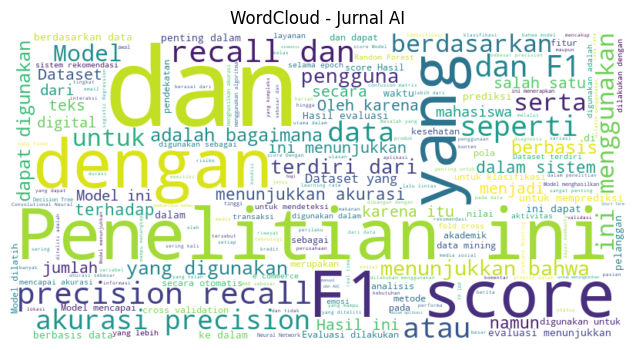

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Gunakan kolom final_clean_text jika ada, kalau tidak pakai text mentah
text_col = 'final_clean_text' if 'final_clean_text' in df.columns else 'text'

# Gabung teks berdasarkan label
text_ai = ' '.join(df[df['label'] == 0][text_col])
text_human = ' '.join(df[df['label'] == 1][text_col])
text_combined = text_ai + ' ' + text_human

# WordCloud AI
wc_ai = WordCloud(width=800, height=400, background_color='white').generate(text_ai)
plt.figure(figsize=(10, 4))
plt.imshow(wc_ai, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Jurnal AI')
plt.show()

### Wordcloud Jurnal_Manusia

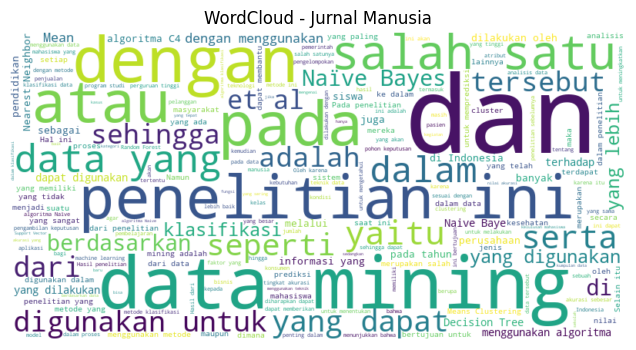

In [129]:
# WordCloud Manusia
wc_human = WordCloud(width=800, height=400, background_color='white').generate(text_human)
plt.figure(figsize=(10, 4))
plt.imshow(wc_human, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Jurnal Manusia')
plt.show()

### Wordcloud Gabungan Jurnal AI dan Manusia

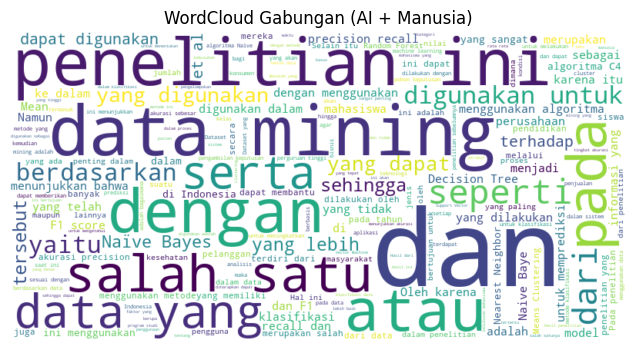

In [130]:
wc_combined = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 4))
plt.imshow(wc_combined, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Gabungan (AI + Manusia)')
plt.show()

# Pemodelan

## Persiapan Fitur X dan Y

In [131]:
X = df['text']   # langsung dari teks mentah
y = df['label']

## TF-IDF 

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

## Split-Data 80% Data Latih dan 20% Data Uji

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

print("Total data :", len(y))
print("Data latih :", len(y_train))
print("Data uji   :", len(y_test))

Total data : 620
Data latih : 496
Data uji   : 124


## Pelatihan Algoritma Logistic Regression

In [134]:
# === Training Logistic Regression ===
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# === Prediksi
y_pred = model.predict(X_test)

## Pelatihan Algoritma Random Forest

In [135]:
# Training model Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=15, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi

## Evaluasi Model dan Confusion Matrix Logistic Regression


=== Evaluasi Logistic Regression ===
Accuracy : 0.9919354838709677
Precision: 1.0
Recall   : 0.9850746268656716
F1 Score : 0.9924812030075187

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.99      0.99        67

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124



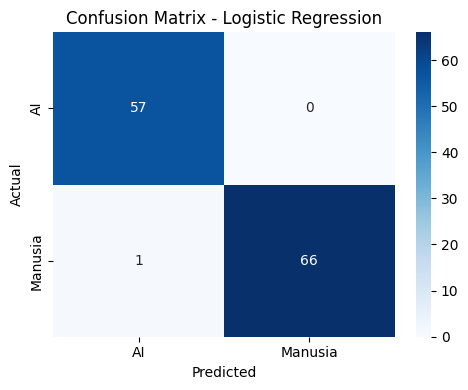

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# === Evaluasi Model
print("\n=== Evaluasi Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['AI', 'Manusia'], yticklabels=['AI', 'Manusia'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Evaluasi Model dan Confusion Matrix Random Forest


=== Evaluasi Random Forest ===
Accuracy : 0.9838709677419355
Precision: 0.9850746268656716
Recall   : 0.9850746268656716
F1 Score : 0.9850746268656716

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.99      0.99      0.99        67

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



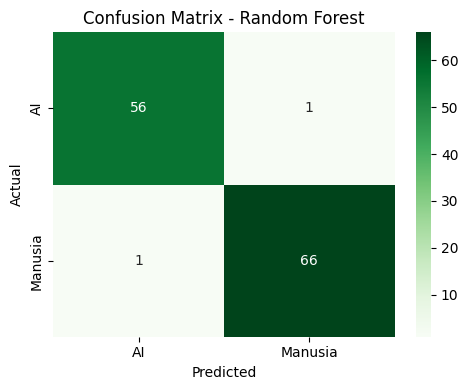

In [137]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi
print("\n=== Evaluasi Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['AI', 'Manusia'], yticklabels=['AI', 'Manusia'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Memilih Algoritma yang Terbaik

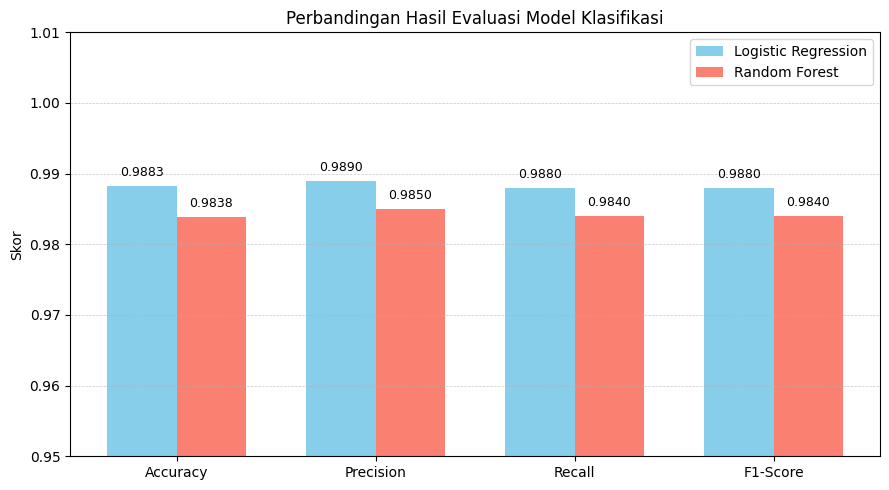

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai metrik evaluasi (dapat disesuaikan dengan hasil model aktual)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logreg_scores = [0.9883, 0.989, 0.988, 0.988]
rf_scores = [0.9838, 0.985, 0.984, 0.984]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(9, 5))
bars1 = plt.bar(x - width/2, logreg_scores, width, label='Logistic Regression', color='skyblue')
bars2 = plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='salmon')

# Menambahkan nilai metrik di atas masing-masing batang
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.4f}', ha='center', va='bottom', fontsize=9)

plt.xticks(x, metrics)
plt.ylabel('Skor')
plt.title('Perbandingan Hasil Evaluasi Model Klasifikasi')
plt.ylim(0.95, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

## Save Model

In [138]:
import joblib

# Simpan model Logistic Regression
joblib.dump(model, "model_logistic_regression.pkl")

# Simpan Model Random Forest
joblib.dump(rf_model, "model_random_forest.pkl")

# Simpan TF-IDF Vectorizer (jika kamu pakai)
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Semua model berhasil disimpan:")
print("- model_logistic_regression.pkl")
print("- model_random_forest.pkl")
print("- tfidf_vectorizer.pkl")

Semua model berhasil disimpan:
- model_logistic_regression.pkl
- model_random_forest.pkl
- tfidf_vectorizer.pkl
